### Data Dictionary

The first file we will use, edges.csv, contains variables V1 and V2, which label the endpoints of edges in our network. Each row represents a pair of users in our graph who are Facebook friends. For a pair of friends A and B, edges.csv will only contain a single row -- the smaller identifier will be listed first in this row. From this row, we will know that A is friends with B and B is friends with A.

The second file, users.csv, contains information about the Facebook users, who are the vertices in our network. This file contains the following variables:

id: A unique identifier for this user; this is the value that appears in the rows of edges.csv

gender: An identifier for the gender of a user taking the values A and B. Because the data is anonymized, we don't know which value refers to males and which value refers to females.

school: An identifier for the school the user attended taking the values A and AB (users with AB attended school A as well as another school B). Because the data is anonymized, we don't know the schools represented by A and B.

locale: An identifier for the locale of the user taking the values A and B. Because the data is anonymized, we don't know which value refers to what locale.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
edges = pd.read_csv("edges.csv")

In [3]:
edges

,V1,V2
0,4019,4026
1,4023,4031
2,4023,4030
3,4027,4032
4,3988,4021
...,...,...
141,4021,4026
142,4013,4031
143,3986,4017
144,4002,4027


In [4]:
users = pd.read_csv("users.csv")

In [5]:
users

,id,gender,school,locale
0,3981,A,A,B
1,3982,B,NaN,B
2,3983,B,NaN,B
3,3984,B,NaN,B
4,3985,B,NaN,B
5,3986,B,A,B
6,3987,A,NaN,A
7,3988,B,NaN,B
8,3989,B,A,B
9,3990,A,NaN,A


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      59 non-null     int64 
 1   gender  57 non-null     object
 2   school  19 non-null     object
 3   locale  56 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


In [7]:
v1 = pd.merge(left=users,right=edges,how='inner',left_on='id',right_on='V1')

In [8]:
v1

,id,gender,school,locale,V1,V2
0,3981,A,A,B,3981,3998
1,3981,A,A,B,3981,4023
2,3981,A,A,B,3981,3994
3,3981,A,A,B,3981,4019
4,3981,A,A,B,3981,4018
...,...,...,...,...,...,...
141,4026,B,NaN,B,4026,4030
142,4027,B,NaN,B,4027,4032
143,4027,B,NaN,B,4027,4038
144,4027,B,NaN,B,4027,4031


In [9]:
v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      146 non-null    int64 
 1   gender  140 non-null    object
 2   school  46 non-null     object
 3   locale  140 non-null    object
 4   V1      146 non-null    int64 
 5   V2      146 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 8.0+ KB


In [10]:
v2 = pd.merge(left=users,right=edges,how='inner',left_on='id',right_on='V2')

In [11]:
v2

,id,gender,school,locale,V1,V2
0,3986,B,A,B,3982,3986
1,3988,B,NaN,B,3985,3988
2,3988,B,NaN,B,3982,3988
3,3989,B,A,B,594,3989
4,3991,B,A,B,3989,3991
...,...,...,...,...,...,...
141,4038,B,NaN,B,4020,4038
142,4038,B,NaN,B,4023,4038
143,4038,B,NaN,B,4014,4038
144,4038,B,NaN,B,4004,4038


### Data Visualization

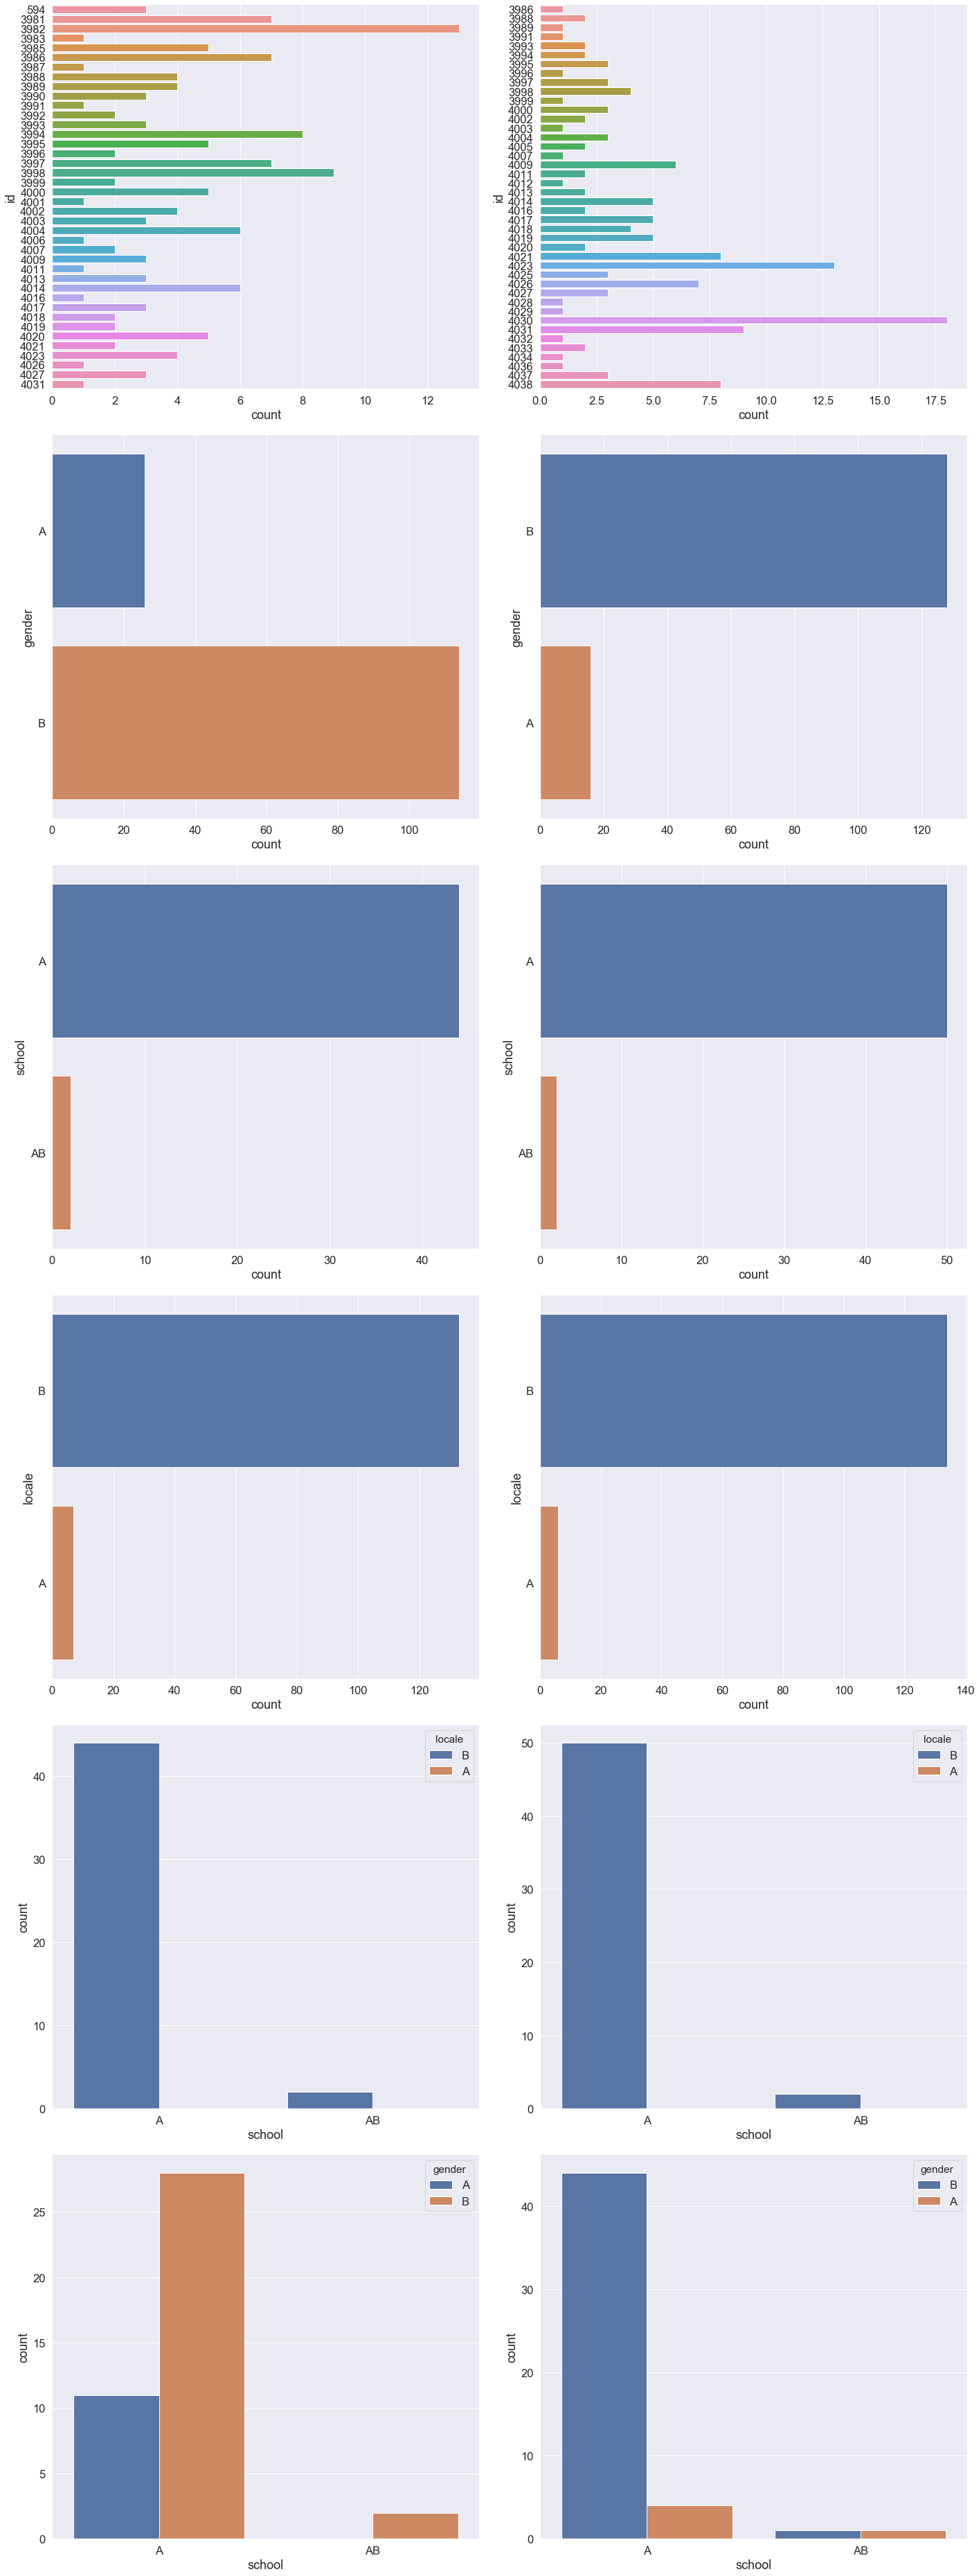

In [12]:
fig = plt.figure(figsize=(20,60))

plt.subplot(7,2,1)
sns.countplot(y=v1.id)
plt.subplot(7,2,2)
sns.countplot(y=v2.id)
plt.subplot(7,2,3)
sns.countplot(y=v1.gender)
plt.subplot(7,2,4)
sns.countplot(y=v2.gender)
plt.subplot(7,2,5)
sns.countplot(y=v1.school)
plt.subplot(7,2,6)
sns.countplot(y=v2.school)
plt.subplot(7,2,7)
sns.countplot(y=v1.locale)
plt.subplot(7,2,8)
sns.countplot(y=v2.locale)
plt.subplot(7,2,9)
sns.countplot(v1.school,hue=v1.locale)
plt.subplot(7,2,10)
sns.countplot(v2.school,hue=v2.locale)
plt.subplot(7,2,11)
sns.countplot(v1.school,hue=v1.gender)
plt.subplot(7,2,12)
sns.countplot(v2.school,hue=v2.gender)
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()